In [17]:
import rasterio
import numpy as np

# Define your value_to_value dictionary
value_to_value = {
    11: 0.0,
    12: 0.0,
    21: 101.3,
    22: 357.03,
    23: 605.67,
    24: 875.03,
    31: 0.0,
    41: 0.0,
    42: 0.0,
    43: 0.0,
    51: 0.0,
    52: 0.0,  
    71: 0.0,
    73: 0.0,
    74: 0.0,
    81: 0.0,
    82: 0.0,
    90: 0.0,
    95: 0.0,
    107:0.0
}
#0 11 21 22 23 24 31 41 42 43 45 46 52 71 81 82 90 95

# Open the input TIFF file
with rasterio.open('/shared_space/ACV/nlcd_nc0.1.tif') as src:
    # Read the image data into a numpy array
    data = src.read(1) 
    for key, value in value_to_value.items():
        data[data == key] = value

    # Define the output file path
    output_file = 'output_3.tif'

    # Write the modified data to a new TIFF file
    with rasterio.open(output_file, 'w', 
                       driver='GTiff', 
                       count=1, 
                       dtype=data.dtype, 
                       crs=src.crs, 
                       transform=src.transform, 
                       width=src.width, 
                       height=src.height) as dst:
        dst.write(data, 1)

print(f"Modified TIFF saved as {output_file}")


Modified TIFF saved as output_2.tif


In [30]:
import rasterio
import numpy as np
import geopandas as gpd
import rasterio.mask
import matplotlib.pyplot as plt

# Function to calculate statistics for a given county
def calculate_stats(county, src):
    # Mask the raster data using the county polygon
    geometry = [county['geometry']]
    out_image , out_transform = rasterio.mask.mask(src, geometry, crop=True)
    
    # Remove masked NoData values (assuming NoData is -99999)
    masked_data = np.ma.masked_equal(out_image, -99999)
    
    # Calculate mean, standard deviation, and maximum values
    mean_cost = np.mean(masked_data)
    max_cost = np.max(masked_data)
    std_cost = np.std(masked_data)
    
    return mean_cost, max_cost, std_cost

# Assuming 'output.tif' is the modified raster after applying the value_to_value mapping
output_file = '/shared_space/ACV/nlcd_nc0.1_remapped.tif'

# Open the modified raster file (output.tif)
with rasterio.open(output_file) as src:
    # List of counties to analyze (replace with your actual GeoDataFrame or shapefile of counties)
    counties = gpd.read_file('/data/HW/HW2/NCDOT_County_Boundaries.shp')  # Replace with your shapefile
    counties_reprojected = counties.to_crs(epsg=4326)
    results = []
    
    # Calculate statistics for each county
    for idx, county in counties_reprojected.iterrows():
        mean_cost, max_cost, std_cost = calculate_stats(county, src)
        results.append({
            'County': county['CountyName'],
            'Mean Cost': mean_cost,
            'Max Cost': max_cost,
            'Std Cost': std_cost
        })
    
    # Create a GeoDataFrame from the results
    results_gdf = gpd.GeoDataFrame(results)
    
    # Print or visualize the results
    print(results_gdf)



         County  Max Cost  Mean Cost   Std Cost
0        Camden     101.0   0.654540   8.075730
1         Gates     101.0   2.708061  16.298475
2       Iredell     107.0  11.592364  32.115482
3        Wilkes     107.0   4.726843  21.302574
4         Union     107.0  11.017673  31.365589
5      Cabarrus     107.0  14.150303  34.998970
6          Wake     107.0  19.680233  39.792500
7      Franklin     107.0   3.782213  19.151392
8        Pender     101.0   2.762193  16.453196
9   New Hanover     107.0  13.725399  34.383492
10       Durham     107.0  21.929825  41.494911
11       Orange     107.0  11.984776  32.559273
12      Chatham     107.0   5.447993  22.794062
13     Alamance     107.0  16.083841  36.864872
14      Harnett     107.0   5.809155  23.472641
15        Moore     107.0   5.852328  23.546362
16     Beaufort     107.0   3.003315  17.131199
17       Martin     107.0   2.296959  15.010427
18         Pitt     107.0   5.589438  22.990488
19       Greene     107.0   2.365451  15

In [19]:
# Save DataFrame to Excel file
results_gdf.to_csv('2020_Land_Cover_County_Value.csv')

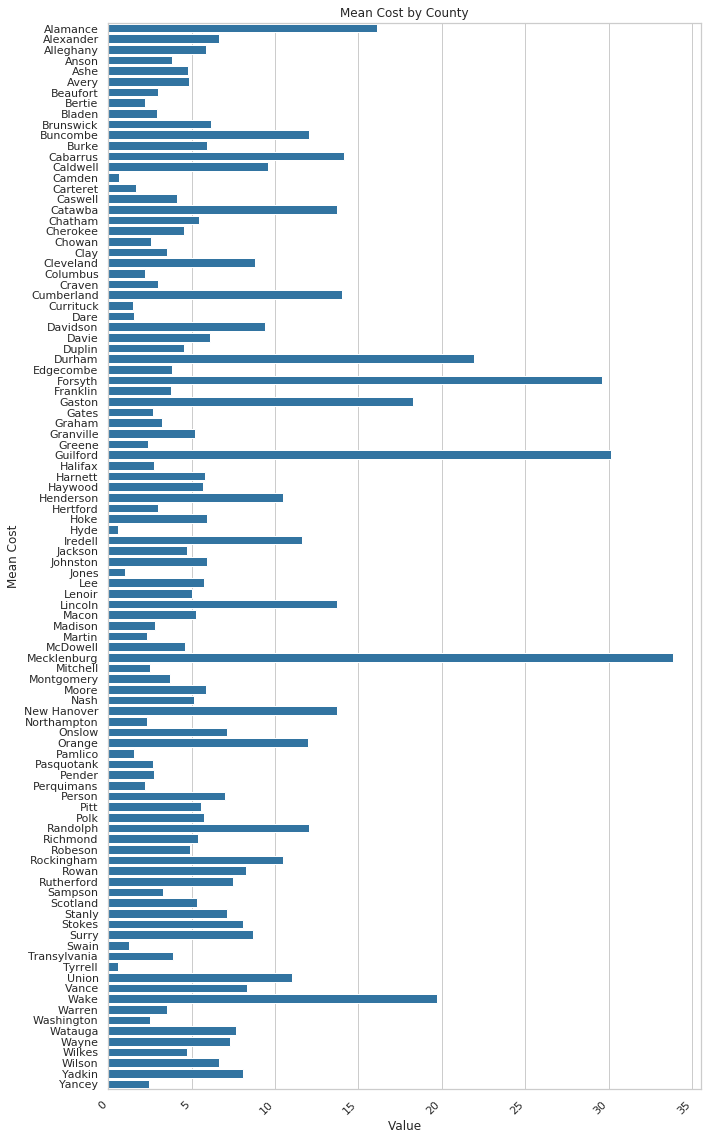

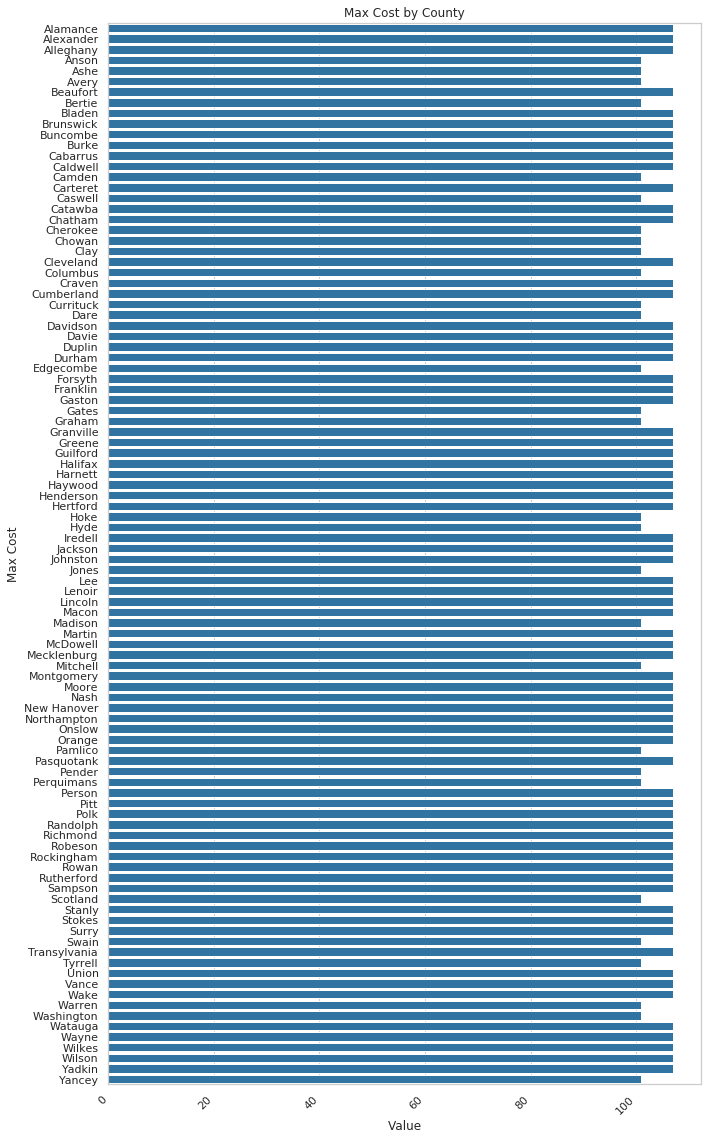

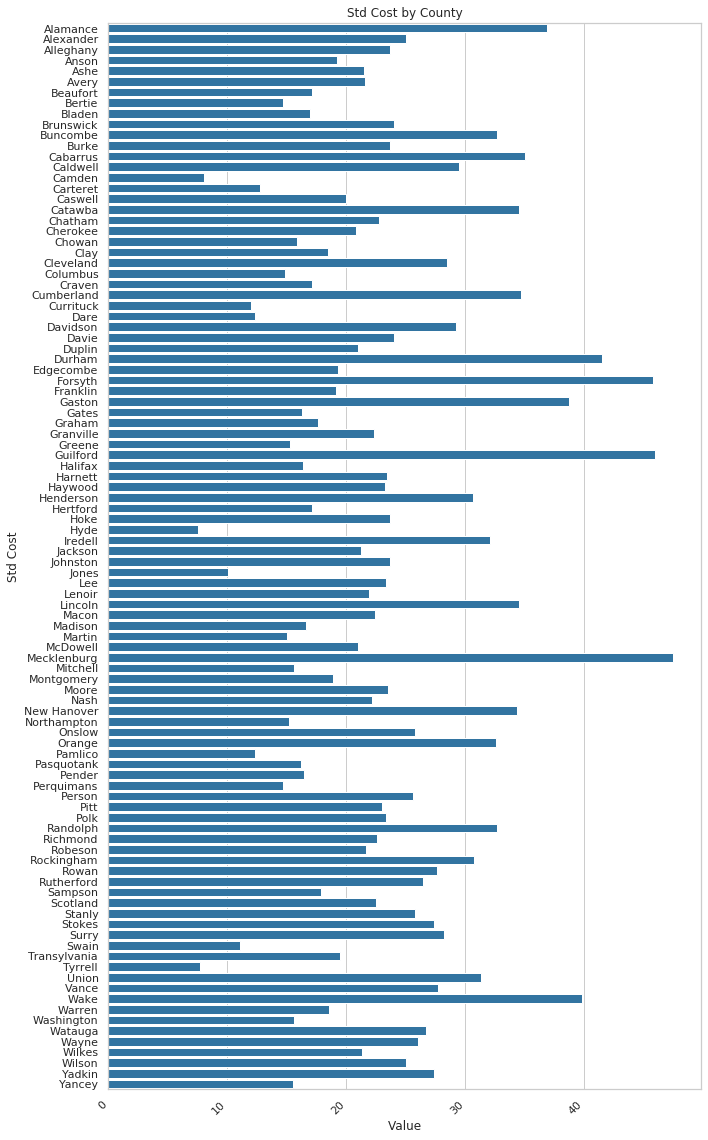

In [31]:
import seaborn as sns
#Once this database is assembled, use bar plots to show the results across all the counties (one bar plot per statistic). Explain the results. 
# Set up the plot style
sns.set(style="whitegrid")

# Define the columns you want to plot
stat_columns = [ 'Mean Cost', 'Max Cost', 'Std Cost']

# Loop through each statistic and create a barplot
for stat in stat_columns:
    plt.figure(figsize=(10, 16))  # Set figure size
    sns.barplot(x=stat, y='County', data=results_gdf.sort_values(by='County',ascending=True), color = "tab:blue")
    # Set the title and labels
    plt.title(f'{stat} by County')
    plt.xlabel('Value')
    plt.ylabel(stat)
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')
    
    # Show the plot
    plt.tight_layout()
    plt.show()

In [25]:
import rasterio
import numpy as np

# Path to the input and output files
input_tif = "/shared_space/ACV/nlcd_nc0.1.tif"
output_tif = "nlcd_nc0.1_remapped.tif"

# Mapping of values
value_to_value = {
    11: 0.0,
    12: 0.0,
    21: 101.3,
    22: 357.03,
    23: 605.67,
    24: 875.03,
    31: 0.0,
    41: 0.0,
    42: 0.0,
    43: 0.0,
    51: 0.0,
    52: 0.0,
    71: 0.0,
    73: 0.0,
    74: 0.0,
    81: 0.0,
    82: 0.0,
    90: 0.0,
    95: 0.0,
    107: 0.0
}

# Open the input file
with rasterio.open(input_tif) as src:
    # Read the data as a numpy array
    data = src.read(1)  # Assuming we're working with the first band

    # Create an array for the remapped values
    remapped_data = np.copy(data)
    
    # Apply the mapping
    for old_value, new_value in value_to_value.items():
        remapped_data[data == old_value] = new_value
    
    # Update the metadata for the output file
    profile = src.profile
    profile.update(dtype=rasterio.float32, nodata=0.0)  # Update to float32 since the mapped values might be float
    
    # Write the remapped data to a new file
    with rasterio.open(output_tif, 'w', **profile) as dst:
        dst.write(remapped_data.astype(rasterio.float32), 1)

print(f"Remapped file saved as {output_tif}")


Remapped file saved as nlcd_nc0.1_remapped.tif


In [26]:
import rasterio
import numpy as np

# Open the input TIFF file
with rasterio.open('nlcd_nc0.1_remapped.tif') as src:
    # Read the raster data into a numpy array (assuming single band)
    data = src.read(1)
    
    # Get all unique pixel values
    unique_values = np.unique(data)

# Print all unique pixel values
print("Unique pixel values in the GeoTIFF:")
print(unique_values)


Unique pixel values in the GeoTIFF:
[  0.  45.  46.  93. 101. 107.]


In [29]:
import rasterio
import numpy as np

# Path to the input and output files
input_tif = "/shared_space/ACV/nlcd_nc0.1.tif"
output_tif = "/shared_space/ACV/nlcd_nc0.1_remapped.tif"

# Mapping of values
value_to_value = {
    0 :0.0,
    11: 0.0,
    12: 0.0,
    21: 101.3,
    22: 357.03,
    23: 605.67,
    24: 875.03,
    31: 0.0,
    41: 0.0,
    42: 0.0,
    43: 0.0,
    45: 0.0,
    46: 0.0,
    51: 0.0,
    52: 0.0,
    71: 0.0,
    73: 0.0,
    74: 0.0,
    81: 0.0,
    82: 0.0,
    90: 0.0,
    95: 0.0
}

# Open the input file
with rasterio.open(input_tif) as src:
    # Read the data as a numpy array
    data = src.read(1)  # Assuming we're working with the first band

    # Get the unique values in the original data
    original_unique_values = np.unique(data)
    print(f"Original unique pixel values: {original_unique_values}")

    # Create an array for the remapped values
    remapped_data = np.copy(data)
    
    # Apply the mapping
    for old_value, new_value in value_to_value.items():
        remapped_data[data == old_value] = new_value
    
    # Handling values that are not mapped (they will stay the same)
    unmapped_values = np.setdiff1d(original_unique_values, list(value_to_value.keys()))
    print(f"Values not mapped (will remain the same): {unmapped_values}")

    # Update the metadata for the output file
    profile = src.profile
    profile.update(dtype=rasterio.float32, nodata=0.0)  # Update to float32 since the mapped values might be float
    
    # Write the remapped data to a new file
    with rasterio.open(output_tif, 'w', **profile) as dst:
        dst.write(remapped_data.astype(rasterio.float32), 1)

print(f"Remapped file saved as {output_tif}")


Original unique pixel values: [ 0 11 21 22 23 24 31 41 42 43 45 46 52 71 81 82 90 95]
Values not mapped (will remain the same): []
Remapped file saved as /shared_space/ACV/nlcd_nc0.1_remapped.tif
